In [48]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

In [15]:
np.random.seed(1)

## Multipvariate Normal

(1,) (1, 1)
(100,) (100, 1) <class 'numpy.ndarray'>
1.0870764500858212 3.1255898724985456


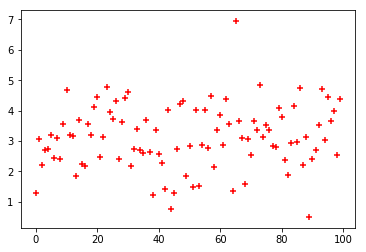

In [21]:
### 1D

mean = np.array([3])
cov = np.eye(1)
size = 100

print(mean.shape, cov.shape)

X = np.linspace(0, size-1, num=size)
Y = np.random.multivariate_normal(mean, cov, size=size)

print(X.shape, Y.shape)
print(np.var(Y), np.mean(Y))

plt.scatter(X, Y, c='r', marker='+')

(2,) (2, 2)
(300, 2)
[[ 1.97364192 -0.23950527]
 [ 3.60959539  0.87287921]
 [ 2.96059751  1.41392441]
 [ 2.62376799 -0.3208868 ]
 [ 3.36431546 -0.72461769]]
3.330564326051448 0.9197547008358371 0.9589411063033126
1.4445657994064762 2.9909216518808908 -0.10179005306793812


Text(0, 0.5, 'Y')

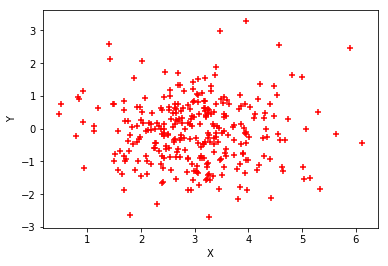

In [35]:
### 2D

mean = np.array([3, 0])
cov = np.eye(2) # 协方差Cov(X, Y) = 0, D(X) = D(Y) = 1
size = 300

print(mean.shape, cov.shape)

XY = np.random.multivariate_normal(mean, cov, size=size)

print(XY.shape)
print(XY[:5])
print(np.var(XY), np.var(XY[:,0]), np.var(XY[:,1]))
print(np.mean(XY), np.mean(XY[:,0]), np.mean(XY[:,1]))
plt.scatter(XY[:,0], XY[:,1], c='r', marker='+')
plt.xlabel('X')
plt.ylabel('Y')

$
X = [\mathbf{x_1}, \mathbf{x_2}, \cdots, \mathbf{x_n}]
$

## Scatter Matrix

$$
S = \sum_{j=1}^{n}(\mathbf{x_j} - \overline{\mathbf{x}})(\mathbf{x_j} - \overline{\mathbf{x}})^T
$$

(3, 500)
0.03689421074351941 -0.02067275040562437 -0.08732962492218015
Scatter Matrix:
 [[474.83941486  -5.49289844 -26.38804904]
 [ -5.49289844 514.38666859 -39.1145724 ]
 [-26.38804904 -39.1145724  496.45740348]]


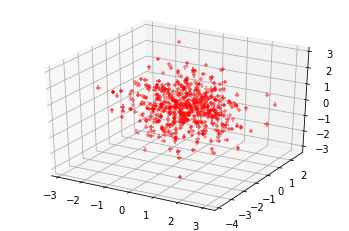

In [142]:
#Create a 3 X 20 matrix with random values.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # eye: 线性无关
samples =  np.random.multivariate_normal(mu_vec1, cov_mat1, 500).T

print(samples.shape)

#Compute the mean vector

mean_x = np.mean(samples[0, :])
mean_y = np.mean(samples[1, :])
mean_z = np.mean(samples[2, :])

print(mean_x, mean_y, mean_z)

mean_vector = np.array([[mean_x],[mean_y],[mean_z]]) # 3x1

#Computation of scatter plot

scatter_matrix = np.zeros((3, 3))
for i in range(samples.shape[1]):
    tt = samples[:, i].reshape(3,1) - mean_vector
    # 协方差有正有负抵消, 方差一直累加
    scatter_matrix += tt.dot(tt.T)
print('Scatter Matrix:\n', scatter_matrix)

ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(samples[0], samples[1], samples[2], c='r', marker='+')

In [99]:
arange = np.arange(0, 40)
samples = np.array([arange * 3, arange * -1]) # 线性负相关
mean_vector = np.array([0, 0])
scatter_matrix = np.zeros((2, 2))
for i in range(samples.shape[1]):
    tt = samples[:, i].reshape(2, 1) - mean_vector
    scatter_matrix += tt.dot(tt.T)
print('Scatter Matrix:', scatter_matrix)

40
Scatter Matrix: [[ 369720. -123240.]
 [-123240.   41080.]]


In [123]:
arange = np.arange(0, 40)
samples = np.array([arange * 3, arange * 1]) # 2x40 线性正相关

mean_x = np.mean(samples[0, :])
mean_y = np.mean(samples[1, :])

mean_vector = np.array([[mean_x], [mean_y]])
scatter_matrix = np.zeros((2, 2))
for i in range(samples.shape[1]):
    tt = samples[:, i].reshape(2, 1) - mean_vector
    scatter_matrix += tt.dot(tt.T)
print('Scatter Matrix:', scatter_matrix)

Scatter Matrix: [[47970. 15990.]
 [15990.  5330.]]


## Covariance Matrix 

协方差:

$$
Cov(X,Y)=\frac{\sum_{i=1}^n{(X_i-\overline{X})(Y_i-\overline{Y})}}{(n-1)}
$$

The maximum likelihood estimate, given n samples, for the covariance matrix of a multivariate normal distribution can be expressed as the normalized scatter matrix:

$$
C_{ML} = \frac{1}{n} S
$$


协方差矩:

$$
C=
\begin{array}{ccc}
cov(x,x)&cov(x,y)&cov(x,z)\\
cov(y,x)&cov(y,y)&cov(y,z)\\
cov(z,x)&cov(z,y)&cov(z,z)
\end{array}
$$

In [124]:
print('Covariance Matrix:', np.cov(samples))
print('Scatter Matrix:', scatter_matrix)
print('Unscaled covariance matrix which is same as Scatter Matrix:', np.cov(samples) * 39) # n - 1

Covariance Matrix: [[1230.          410.        ]
 [ 410.          136.66666667]]
Scatter Matrix: [[47970. 15990.]
 [15990.  5330.]]
Unscaled covariance matrix which is same as Scatter Matrix: [[47970. 15990.]
 [15990.  5330.]]


## Correlation Matrix

相关系数:

$$
\rho_{X,Y} = corr(X, Y) = \frac{cov(X, Y)}{\sigma_X \sigma_Y}
$$

Covariance Matrix: [[1230.          410.        ]
 [ 410.          136.66666667]]
Correlation Matrix: [[1. 1.]
 [1. 1.]]
Std deviation products : [[1199.25  399.75]
 [ 399.75  133.25]]
Covariance Matrix computed from covariance : [[1.02564103 1.02564103]
 [1.02564103 1.02564103]]
[[1.02564103 1.02564103]
 [1.02564103 1.02564103]]


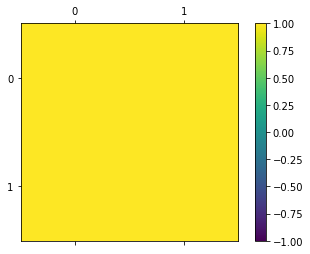

In [138]:
print('Covariance Matrix:',np.cov(samples))

std_dev_of_x1 = np.std(arange * 3)
std_dev_of_x2 = np.std(arange * -1)

std_dev_products = np.array(
   [[std_dev_of_x1 * std_dev_of_x1, std_dev_of_x1 * std_dev_of_x2],
    [std_dev_of_x1 * std_dev_of_x2, std_dev_of_x2 * std_dev_of_x2]]
)

pho = np.divide(np.cov(samples), std_dev_products)

print('Correlation Matrix:', np.corrcoef(samples))
print('Std deviation products :', std_dev_products)
print('Covariance Matrix computed from covariance :', pho)

## How are these matrices related to each other?

Basically, all of these matrices are calculated using the same procedure: $A^TA$. The only difference between them is how the data is scaled before the matrix multiplication is executed: 

- scatter matrix: no scaling ???

- covariance: the mean of each variable is subtracted before multiplication

- cross correlation: each variable is standardized (mean subtracted, then divided by standard deviation)


# References

[Scater,Covariance,Correlation Matrix Explained](https://medium.com/@raghavan99o/scatter-matrix-covariance-and-correlation-explained-14921741ca56)

[seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

[Visualize ML](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas)

[wiki: Scatter Matrix](https://en.wikipedia.org/wiki/Scatter_matrix)

[wiki: Covariance Matrix](https://en.wikipedia.org/wiki/Covariance_matrix)

[wiki: Correlation Matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices)

[Difference](http://www.statistics4u.com/fundstat_eng/cc_covarmat.html)